In [61]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('data/rents_clean.csv')
data.shape

(8773, 106)

In [33]:
price = data['price'] / data['price'].max()
print(price.head())
data.head()

0    0.075
1    0.300
2    0.300
3    0.180
4    0.180
Name: price, dtype: float64


In [146]:
features = pd.DataFrame(data)
features.drop(['price'], axis=1, inplace=True)
features.head()

,bedrooms,type_Apartment,type_House,type_Townhouse,location_Allsops,location_Baba Dogo,location_Balozi,location_Buruburu,location_Dagoretti,location_Donholm,...,location_Thome,location_Umoja,location_Upper Hill,location_Utawala,location_Uthiru,location_Valley Arcade,location_Waithaka,location_Westlands,location_Windsor,location_Woodley
0,4.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X = np.array(features, dtype=float)
y = np.array(price, dtype=float)
split = int(len(X) * 0.9)

# Training set
X_train = X[:split]
y_train = y[:split]

part_x_train = X_train[1000:]
part_y_train = y_train[1000:]

# Validation Set
X_val = X_train[:1000]
y_val = y_train[:1000]

# Testing set
X_test = X[split:]
y_test = y[split:]
X_test.shape

(878, 105)

In [112]:
X_train.shape[1]

105

## Create model

### Assemble layers into the model

In [113]:
# Build Layer
layers = keras.layers.Dense

model = tf.keras.Sequential([
    layers(256, activation='relu', input_shape=(part_x_train.shape[1],)),
    layers(256, activation='relu'),
    layers(1),
])

### Compile model

In [120]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

### Train the model

In [121]:
history = model.fit(part_x_train, part_y_train, epochs=10, batch_size=256, verbose=False, validation_data=(X_val, y_val))
result = model.evaluate(X_test, y_test)

print("Model trained")

28/28 [==============================] - 0s 1ms/step - loss: 0.0131 - mae: 0.0804
Model trained


In [122]:
result

[0.013139203190803528, 0.08042478561401367]

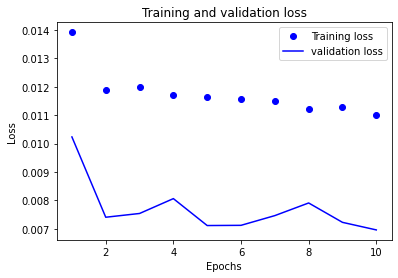

In [123]:
import matplotlib.pyplot as plt
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

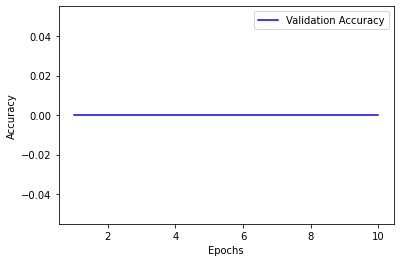

In [125]:
plt.clf()
acc = history.history['mae']

# plt.plot(epochs, acc, 'bo', label='mae')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate

In [128]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
test_mae_score

28/28 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0804


0.08042478561401367

#### Predict

In [144]:
prediction = model.predict(X_test)
num = 11

y_test[num], prediction[num]

(0.35, array([0.40281266], dtype=float32))